#Importing Libraries

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [135]:
df = pd.read_csv("/content/drive/MyDrive/CSV/^NSEI (2).csv")

In [136]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0.0
1,2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0.0
2,2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0.0
3,2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0.0
4,2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0.0


In [137]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0.0
1,2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0.0
2,2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0.0
3,2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0.0
4,2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0.0
...,...,...,...,...,...,...,...
3596,2022-04-11,17740.900391,17779.050781,17650.949219,17674.949219,17674.949219,251700.0
3597,2022-04-12,17584.849609,17595.300781,17442.349609,17530.300781,17530.300781,266000.0
3598,2022-04-13,17599.900391,17663.650391,17457.400391,17475.650391,17475.650391,245100.0
3599,2022-04-18,17183.449219,17237.750000,17067.849609,17173.650391,17173.650391,376100.0


#Data Preprocessing

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3601 entries, 0 to 3600
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3601 non-null   object 
 1   Open       3571 non-null   float64
 2   High       3571 non-null   float64
 3   Low        3571 non-null   float64
 4   Close      3571 non-null   float64
 5   Adj Close  3571 non-null   float64
 6   Volume     3571 non-null   float64
dtypes: float64(6), object(1)
memory usage: 197.1+ KB


In [139]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3.571000e+03
mean,8242.757085,8291.736266,8179.481555,8236.812672,8236.812672,1.908289e+05
std,3564.148151,3571.392797,3546.859430,3560.113978,3560.113978,2.205500e+05
min,2553.600098,2585.300049,2252.750000,2524.199951,2524.199951,0.000000e+00
25%,5389.975098,5427.574951,5348.550049,5386.500000,5386.500000,0.000000e+00
50%,7804.049805,7846.049805,7746.049805,7790.450195,7790.450195,1.534000e+05
75%,10594.500000,10631.475098,10530.075195,10583.649902,10583.649902,2.646500e+05
max,18602.349609,18604.449219,18445.300781,18477.050781,18477.050781,1.811000e+06


In [140]:
df = df.drop(['Date', 'High', 'Low', 'Adj Close'], axis = 'columns')

In [141]:
df

,Open,Close,Volume
0,4518.450195,4494.649902,0.0
1,4494.100098,4546.200195,0.0
2,4550.250000,4732.350098,0.0
3,4734.850098,4747.549805,0.0
4,4752.950195,4837.549805,0.0
...,...,...,...
3596,17740.900391,17674.949219,251700.0
3597,17584.849609,17530.300781,266000.0
3598,17599.900391,17475.650391,245100.0
3599,17183.449219,17173.650391,376100.0


In [142]:
df = df.drop(df.index[0:1321], axis = 0)
df.head()

,Open,Close,Volume
1321,6085.750000,6082.299805,130900.0
1322,6080.149902,6048.500000,129000.0
1323,6052.850098,6054.299805,137000.0
1324,6046.200195,6019.350098,185200.0
1325,6024.500000,6074.649902,147600.0


In [143]:
df.describe()

,Open,Close,Volume
count,2266.000000,2266.000000,2.266000e+03
mean,10125.504878,10117.103158,3.007281e+05
std,3147.340953,3144.290119,2.088148e+05
min,5233.450195,5285.000000,0.000000e+00
25%,7967.412475,7961.074829,1.593250e+05
50%,9654.949707,9655.524903,2.195000e+05
75%,11513.887695,11498.650391,3.785000e+05
max,18602.349609,18477.050781,1.811000e+06


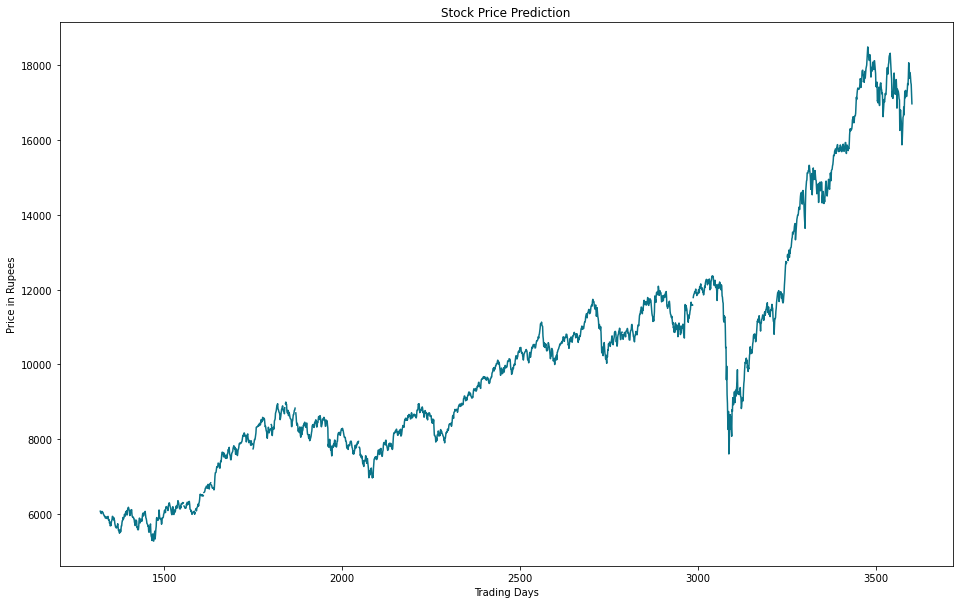

In [144]:
plt.rcParams['figure.figsize'] = (16, 10)

fig, ax = plt.subplots()
ax.plot(df['Close'], '#0A7388')

#ax.format_ydata = price
ax.set_title("Stock Price Prediction")

plt.ylabel("Price in Rupees")
plt.xlabel("Trading Days")

plt.show()

#Normalizing the Data

In [145]:
def normalize_data(data):

  scaler = MinMaxScaler()
  numerical = ['Open', 'Close', 'Volume']
  data[numerical] = scaler.fit_transform(data[numerical])

  return data


df = normalize_data(df)

df

,Open,Close,Volume
1321,0.063752,0.060438,0.072281
1322,0.063334,0.057876,0.071231
1323,0.061292,0.058315,0.075649
1324,0.060794,0.055666,0.102264
1325,0.059171,0.059858,0.081502
...,...,...,...
3596,0.935563,0.939198,0.138984
3597,0.923891,0.928233,0.146880
3598,0.925016,0.924091,0.135340
3599,0.893866,0.901198,0.207675


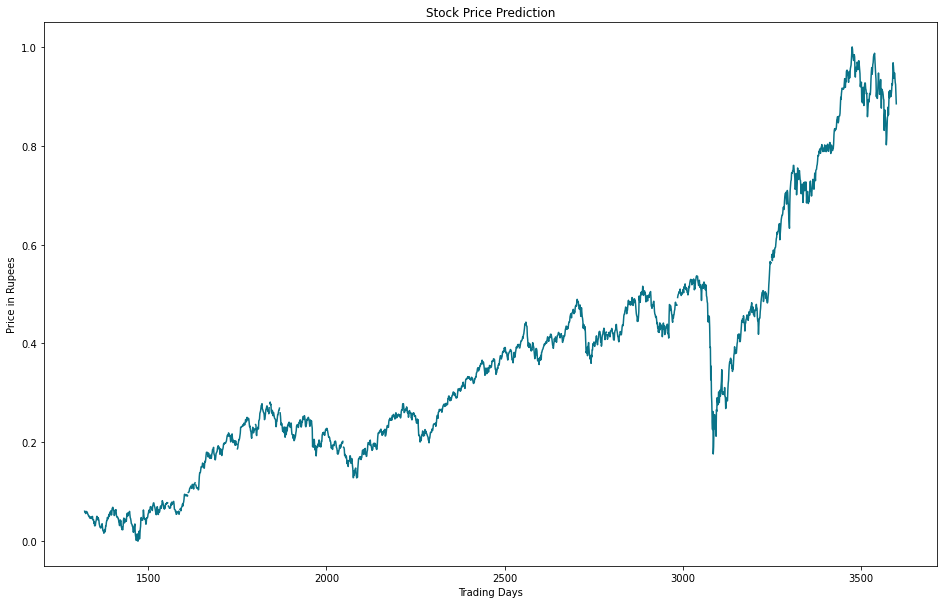

In [146]:
plt.rcParams['figure.figsize'] = (16, 10)

fig, ax = plt.subplots()
ax.plot(df['Close'], '#0A7388')

#ax.format_ydata = price
ax.set_title("Stock Price Prediction")

plt.ylabel("Price in Rupees")
plt.xlabel("Trading Days")

plt.show()

#Basic LSTM Model

In [147]:
import math
import pandas as pd
import numpy as np
from IPython.display import display

from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split


import time

df

,Open,Close,Volume
1321,0.063752,0.060438,0.072281
1322,0.063334,0.057876,0.071231
1323,0.061292,0.058315,0.075649
1324,0.060794,0.055666,0.102264
1325,0.059171,0.059858,0.081502
...,...,...,...
3596,0.935563,0.939198,0.138984
3597,0.923891,0.928233,0.146880
3598,0.925016,0.924091,0.135340
3599,0.893866,0.901198,0.207675


In [148]:
df.isnull().sum()

Open      14
Close     14
Volume    14
dtype: int64

In [149]:
df = df.dropna(how='any',axis=0) 

In [150]:
df.isnull().sum()

Open      0
Close     0
Volume    0
dtype: int64

In [151]:
def train_test_split_lstm(stocks, prediction_time=1, test_data_size=450, unroll_length=50):
    test_data_cut = test_data_size + unroll_length + 1

    x_train = stocks[0:-prediction_time - test_data_cut].values
    y_train = stocks[prediction_time:-test_data_cut]['Close'].values

    x_test = stocks[0 - test_data_cut:-prediction_time].values
    y_test = stocks[prediction_time - test_data_cut:]['Close'].values

    return x_train, x_test, y_train, y_test



In [152]:
X_train, X_test,y_train, y_test = train_test_split_lstm(df, 5)

In [153]:
def unroll(data, sequence_length=24):

    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])
    return np.asarray(result)

In [154]:
unroll_length = 50
X_train = unroll(X_train, unroll_length)
X_test = unroll(X_test, unroll_length)
y_train = y_train[-X_train.shape[0]:]
y_test = y_test[-X_test.shape[0]:]

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

x_train (1710, 50, 3)
y_train (1710,)
x_test (446, 50, 3)
y_test (446,)


#Build a basic Long-Short Term Memory model

In [155]:
def build_basic_model(input_dim, output_dim, return_sequences):
    model = Sequential()
    model.add(LSTM(
        input_shape=(None, input_dim),
        units=output_dim,
        return_sequences=return_sequences))

    model.add(LSTM(
        100,
        return_sequences=False))

    model.add(Dense(
        units=1))
    model.add(Activation('linear'))

    return model

In [156]:
model = build_basic_model(input_dim = X_train.shape[-1],output_dim = unroll_length, return_sequences=True)

In [157]:
start = time.time()
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)

compilation time :  0.007558345794677734


In [158]:
def standardize(train, test):


    mean = np.mean(train, axis=0)
    std = np.std(train, axis=0)+0.000001

    X_train = (train - mean) / std
    X_test = (test - mean) /std
    return X_train, X_test

standardize(X_train, X_test)

(array([[[-1.46385032, -1.46432493, -0.70401641],
         [-1.46828257, -1.48383625, -0.71610383],
         [-1.48428254, -1.48225533, -0.66030869],
         ...,
         [-1.78927629, -1.7705893 , -0.22397562],
         [-1.76503103, -1.76116147, -0.85480443],
         [-1.76515894, -1.74002637, -0.8069976 ]],
 
        [[-1.46683847, -1.48238946, -0.71705968],
         [-1.48284483, -1.48073746, -0.66121789],
         [-1.48782859, -1.50092397, -0.32981793],
         ...,
         [-1.76256617, -1.75879528, -0.85446491],
         [-1.76268633, -1.73755271, -0.80640094],
         [-1.7443889 , -1.78068925, -0.6142873 ]],
 
        [[-1.48140531, -1.47928971, -0.66214063],
         [-1.48639202, -1.49941082, -0.33053011],
         [-1.49940018, -1.47138518, -0.58762815],
         ...,
         [-1.76022361, -1.73520724, -0.80600908],
         [-1.74193488, -1.77817915, -0.61334982],
         [-1.79809445, -1.8337617 , -0.64855939]],
 
        ...,
 
        [[ 1.87712893,  1.88842825

In [199]:
model.fit(X_train, y_train, epochs=10, validation_split=0.05)

Epoch 1/10
51/51 [==============================] - 11s 209ms/step - loss: 6.8887e-04 - val_loss: 0.0067
Epoch 2/10
51/51 [==============================] - 9s 167ms/step - loss: 7.6617e-04 - val_loss: 0.0062
Epoch 3/10
51/51 [==============================] - 9s 167ms/step - loss: 7.3220e-04 - val_loss: 0.0088
Epoch 4/10
51/51 [==============================] - 9s 168ms/step - loss: 6.7912e-04 - val_loss: 0.0077
Epoch 5/10
51/51 [==============================] - 8s 166ms/step - loss: 6.7206e-04 - val_loss: 0.0049
Epoch 6/10
51/51 [==============================] - 9s 167ms/step - loss: 8.0132e-04 - val_loss: 0.0047
Epoch 7/10
51/51 [==============================] - 8s 166ms/step - loss: 6.1977e-04 - val_loss: 0.0059
Epoch 8/10
51/51 [==============================] - 9s 167ms/step - loss: 6.2808e-04 - val_loss: 0.0052
Epoch 9/10
51/51 [==============================] - 9s 167ms/step - loss: 5.7978e-04 - val_loss: 0.0057
Epoch 10/10
51/51 [==============================] - 9s 167ms/s

Making Predictions

In [200]:
predictions = model.predict(X_test)

Plotting the Results

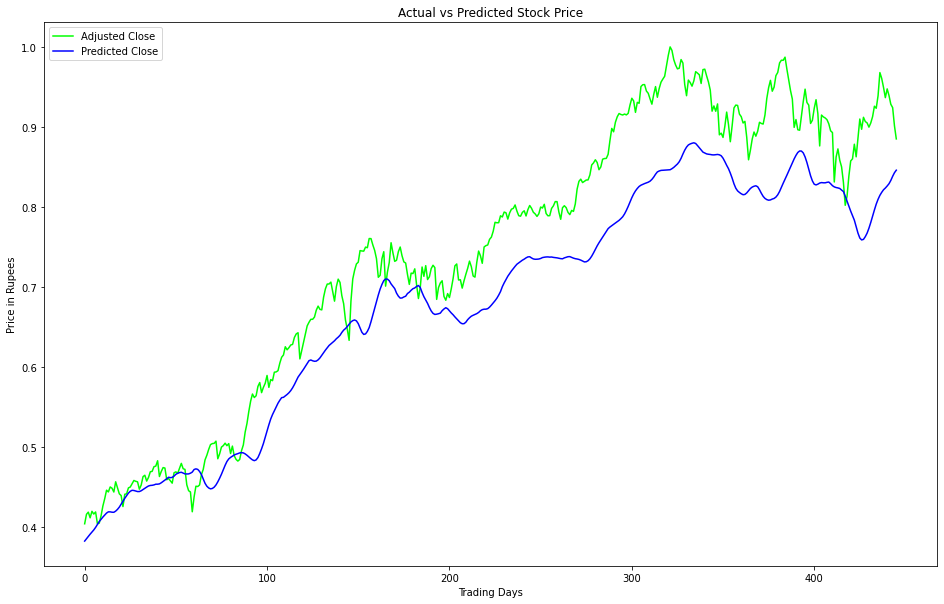

In [201]:
plt.rcParams['figure.figsize'] = (16, 10)
fig = plt.figure()
ax = fig.add_subplot(111)

plt.ylabel("Price in Rupees")
plt.xlabel("Trading Days")

plt.plot(y_test, '#00FF00', label='Adjusted Close')
plt.plot(predictions, '#0000FF', label='Predicted Close')

ax.set_title("Actual vs Predicted Stock Price")
ax.legend(loc='upper left')

plt.show()

Test Score

In [202]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.00055980 MSE (0.02366018 RMSE)
Test Score: 0.00563312 MSE (0.07505411 RMSE)


In [203]:
from sklearn.metrics import explained_variance_score

explained_variance_score(y_test, predictions)

0.9437635114444465

In [204]:
from sklearn.metrics import max_error

max_error(y_test, predictions)

0.16079996594344415

In [205]:
from sklearn.metrics import r2_score

r2_score(y_test, predictions)

0.8167380019559851

#Improved LSTM Model

In [206]:
def build_improved_model(input_dim, output_dim, return_sequences):
    model = Sequential()
    model.add(LSTM(
        input_shape=(None, input_dim),
        units=output_dim,
        return_sequences=return_sequences))

    model.add(Dropout(0.2))

    model.add(LSTM(
        128,
        return_sequences=False))

    model.add(Dropout(0.2))

    model.add(Dense(
        units=1))
    model.add(Activation('linear'))

    return model

In [207]:
batch_size = 128
epochs = 10

model = build_improved_model( X_train.shape[-1],output_dim = unroll_length, return_sequences=True)

start = time.time()

model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)

compilation time :  0.014868974685668945


In [208]:
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=2, validation_split=0.05)

Epoch 1/10
13/13 - 9s - loss: 0.0258 - val_loss: 0.0160 - 9s/epoch - 665ms/step
Epoch 2/10
13/13 - 3s - loss: 0.0046 - val_loss: 0.0107 - 3s/epoch - 258ms/step
Epoch 3/10
13/13 - 3s - loss: 0.0019 - val_loss: 0.0075 - 3s/epoch - 260ms/step
Epoch 4/10
13/13 - 3s - loss: 0.0010 - val_loss: 0.0066 - 3s/epoch - 258ms/step
Epoch 5/10
13/13 - 4s - loss: 8.1195e-04 - val_loss: 0.0069 - 4s/epoch - 310ms/step
Epoch 6/10
13/13 - 3s - loss: 7.7048e-04 - val_loss: 0.0071 - 3s/epoch - 261ms/step
Epoch 7/10
13/13 - 3s - loss: 7.4823e-04 - val_loss: 0.0080 - 3s/epoch - 257ms/step
Epoch 8/10
13/13 - 3s - loss: 7.6485e-04 - val_loss: 0.0076 - 3s/epoch - 258ms/step
Epoch 9/10
13/13 - 3s - loss: 7.7025e-04 - val_loss: 0.0066 - 3s/epoch - 261ms/step
Epoch 10/10
13/13 - 3s - loss: 7.2174e-04 - val_loss: 0.0066 - 3s/epoch - 261ms/step


In [209]:
predictions = model.predict(X_test, batch_size=batch_size)

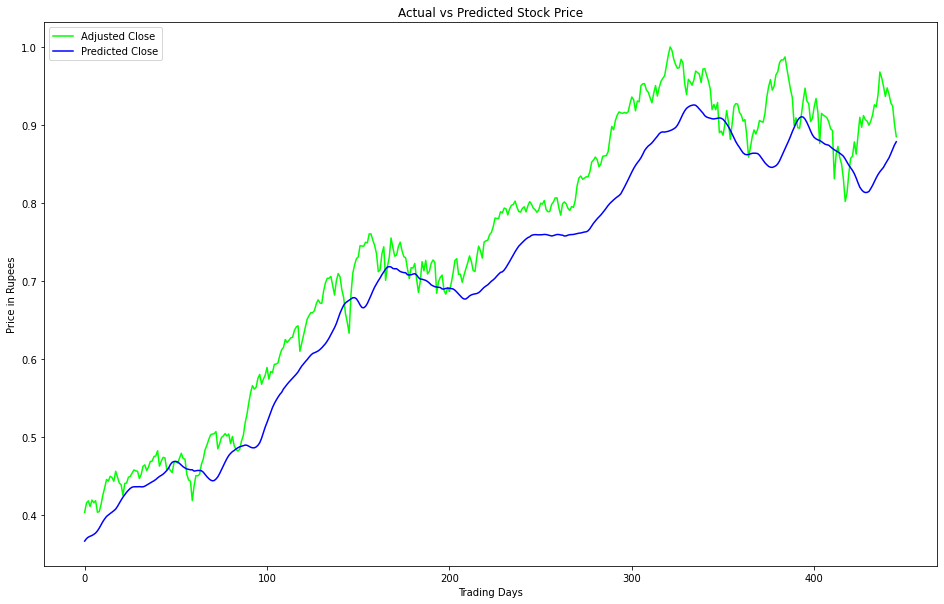

In [210]:
plt.rcParams['figure.figsize'] = (16, 10)
fig = plt.figure()
ax = fig.add_subplot(111)

plt.ylabel("Price in Rupees")
plt.xlabel("Trading Days")

plt.plot(y_test, '#00FF00', label='Adjusted Close')
plt.plot(predictions, '#0000FF', label='Predicted Close')

ax.set_title("Actual vs Predicted Stock Price")
ax.legend(loc='upper left')

plt.show()

In [211]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.00071756 MSE (0.02678737 RMSE)
Test Score: 0.00289859 MSE (0.05383851 RMSE)


In [212]:
from sklearn.metrics import explained_variance_score

explained_variance_score(y_test, predictions)

0.9653718928190143

In [213]:
from sklearn.metrics import max_error

max_error(y_test, predictions)

0.12793567045857845

In [214]:
from sklearn.metrics import r2_score

r2_score(y_test, predictions)

0.9057004615200844